# Data Cleaning Guide

In [1]:
import pandas as pd
import numpy as np

## 1. Basic Functions

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                       columns= iris['feature_names'] + ['target'])

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### 1.1 Constant Values

In [3]:
print(df_iris.shape)

for i in df_iris.columns:
    if df_iris[i].nunique()==1:
        df_iris.drop(i, axis=1, inplace=True)
        
print(df_iris.shape)

(150, 5)
(150, 5)


### 1.2 Duplicates

In [4]:
print(df_iris.shape)
df_iris.drop_duplicates(inplace=True)
print(df_iris.shape)

(150, 5)
(149, 5)


### 1.3 Missing Data

In [5]:
df_missings = pd.read_csv('data/missings.csv', header=None)
df_missings.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.0,8.4,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.0,6.7,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.0,7.2,3,5.3,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.0,7.4,?,?,2,2,4300,0,0,2


In [6]:
df_missings = df_missings.replace('?', np.nan)

pd.DataFrame(data={'missings':df_missings.isnull().sum(), 
                   'percent_missing': df_missings.isnull().sum() / len(df_missings)}, 
             index=df_missings.columns)

,missings,percent_missing
0,1,0.003333
1,0,0.000000
2,0,0.000000
3,60,0.200000
4,24,0.080000
5,58,0.193333
6,56,0.186667
7,69,0.230000
8,47,0.156667
9,32,0.106667


In [7]:
df_missings[3] = df_missings[3].astype(float)
df_missings[3] = df_missings[3].fillna(df_missings[3].mean())
df_missings[5] = df_missings[5].astype(float)
df_missings[5] = df_missings[5].fillna(df_missings[5].median())

In [8]:
from sklearn.impute import SimpleImputer

for i in df_missings.columns:
    df_missings[i] = df_missings[i].astype(float)
    
df_missings_val = df_missings.values
print('Missing: %d' % sum(np.isnan(df_missings_val).flatten()))

imputer = SimpleImputer(strategy='mean')
df_missings_val = imputer.fit_transform(df_missings_val)
print('Missing: %d' % sum(np.isnan(df_missings_val).flatten()))

Missing: 1487
Missing: 0


#### Categorical data

In [31]:
cat_data = pd.read_csv('data/categorical_input.csv', header=None)
cat_data.head()

,0,1,2,3,4,5,6,7,8,9
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [32]:
pd.DataFrame(data={'missings':cat_data.isnull().sum(), 
                   'percent_missing': cat_data.isnull().sum() / len(cat_data)}, 
             index=cat_data.columns)

,missings,percent_missing
0,0,0.000000
1,0,0.000000
2,0,0.000000
3,0,0.000000
4,8,0.027972
5,0,0.000000
6,0,0.000000
7,1,0.003497
8,0,0.000000
9,0,0.000000


In [33]:
for i in cat_data.columns:
    cat_data[i] = cat_data[i].fillna(cat_data[i].mode()[0])

#### SimpleImputer + Regression + Crossvalidation

>mean 0.818 (0.023)
>median 0.823 (0.028)
>most_frequent 0.832 (0.033)
>constant 0.840 (0.013)


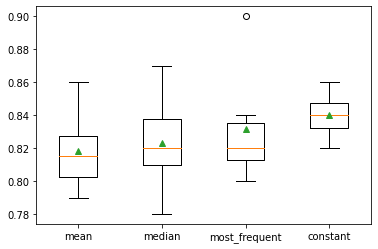

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt

results = list()

df_missings_val = df_missings.values
ix = [i for i in range(df_missings_val.shape[1]) if i != 23]
X, y = df_missings_val[:, ix], df_missings_val[:, 23]

strategies = ['mean', 'median', 'most_frequent', 'constant']

for s in strategies:
    steps = list()
    steps.append(('imputer', SimpleImputer(strategy=s)))
    steps.append(('scaler', MinMaxScaler()))
    steps.append(('model', LogisticRegression()))
    pipeline = Pipeline(steps=steps)
  
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    results.append(scores)
    print('>%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))

plt.boxplot(results, labels=strategies, showmeans=True)
plt.show()

#### KNNImputer + Regression + Crossvalidation

Each sample’s missing values are imputed using the mean value from `n_neighbors`


> 1 0.825 (0.028)
> 3 0.832 (0.029)
> 5 0.833 (0.027)
> 7 0.838 (0.030)


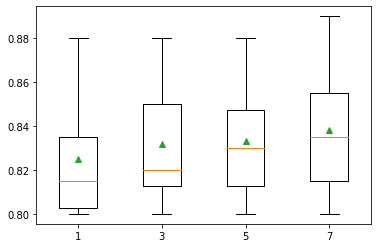

In [13]:
from sklearn.impute import KNNImputer

results = list()
strategies = [str(i) for i in [1,3,5,7]]

for s in strategies:
    steps = list()
    steps.append(('imputer',  KNNImputer(n_neighbors=int(s))))
    steps.append(('scaler', MinMaxScaler()))
    steps.append(('model', LogisticRegression()))
    pipeline = Pipeline(steps=steps)
  
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    results.append(scores)
    print('> %s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))

plt.boxplot(results, labels=strategies, showmeans=True)
plt.show()

## 2. Outliers

### 2.1 Manual Gaussian Data

In [14]:
from numpy.random import seed
from numpy.random import randn

In [15]:
seed(1)
data = 5 * randn(1000) + 50 

mean, std = np.mean(data), np.std(data)
print('mean=%.3f stdv=%.3f' % (mean, std))

mean=50.194 stdv=4.905


In [16]:
# define outliers
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 4


In [17]:
clean_data = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(clean_data))

Non-outlier observations: 996


### 2.2 Manual Non Gaussian Data

In [18]:
# calculate interquartile range
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
print('Percentile: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentile: 25th=46.999, 75th=53.520, IQR=6.521


In [19]:
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 9


In [20]:
# remove outliers
clean_data = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(clean_data))

Non-outlier observations: 991


### 2.3 LocalOutlierFactor

LocalOutlierFactor compares the density of each sample with the density of its nearest neighbors.

In [21]:
from sklearn.neighbors import LocalOutlierFactor

In [22]:
data = df_iris.values
X, y = data[:, :-1], data[:, -1]
print(f'Raw observations:{len(X)}')

Raw observations:149


In [23]:
lof = LocalOutlierFactor()
lof_result = lof.fit_predict(X)
mask = lof_result != -1
print(f'Identified outliers: {np.size(mask) - np.count_nonzero(mask)}')

Identified outliers: 6


In [24]:
X_clean, y_clean = X[mask], y[mask]
print('Non-outlier observations: %d' % len(X_clean))

Non-outlier observations: 143


## 3. Variance Threshold
Remove those variables with a low variance, meaning they have a low numbre of unique values. 

In [25]:
from sklearn.feature_selection import VarianceThreshold

In [26]:
df = pd.read_csv('data/data_cleaning.csv', header=None)
print(f'Shape:{df.shape}')

Shape:(937, 50)


In [27]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [28]:
thresholds = np.arange(0.0, 0.55, 0.05)

results = list()
for t in thresholds:
    transform = VarianceThreshold(threshold=t)
    X_sel = transform.fit_transform(df)
    n_features = X_sel.shape[1]
    print('Threshold=%.2f, Features=%d' % (t, n_features))
    results.append(n_features)

Threshold=0.00, Features=49
Threshold=0.05, Features=37
Threshold=0.10, Features=36
Threshold=0.15, Features=35
Threshold=0.20, Features=35
Threshold=0.25, Features=35
Threshold=0.30, Features=35
Threshold=0.35, Features=35
Threshold=0.40, Features=35
Threshold=0.45, Features=33
Threshold=0.50, Features=31


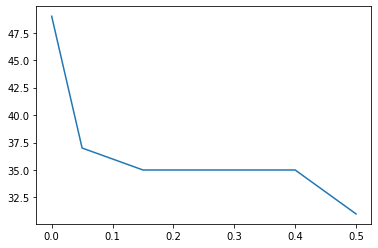

In [29]:
from matplotlib import pyplot as plt

plt.plot(thresholds, results)
plt.show()

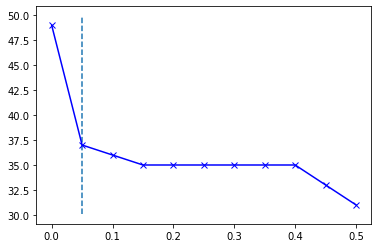

In [30]:
from kneed import KneeLocator

kn = KneeLocator(thresholds, results, curve='convex', direction='decreasing')
plt.plot(thresholds, results, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')